# [Scikit surprise](https://github.com/NicolasHug/Surprise/tree/master/examples)

In [2]:
!pip install scikit-surprise

    100% |████████████████████████████████| 3.3MB 13kB/s ta 0:00:0154
    100% |████████████████████████████████| 276kB 11kB/s ta 0:00:01
  Running setup.py bdist_wheel for scikit-surprise ... done
  Stored in directory: /Users/limheeyeon/Library/Caches/pip/wheels/ec/c0/55/3a28eab06b53c220015063ebbdb81213cd3dcbb72c088251ec
Successfully built scikit-surprise


In [31]:
import surprise

In [34]:
import pandas as pd
d_cols = ["user_id", "movie_id", "rating", "unix_timestamp"]
data = pd.read_csv('ml-100k/u.data', sep='\t', names=d_cols)

u_cols = ["user_id", "age", "sex","occupation","zip_code"]
user = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols)

i_cols = ["movie_id", "title","release_date", "video_release", "imdb_url"]
item = pd.read_csv('ml-100k/u.item',usecols=range(5), sep='|', encoding='latin1', names=i_cols)

In [40]:
data = surprise.Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /Users/limheeyeon/.surprise_data/ml-100k


In [51]:
data1 = pd.DataFrame(data.raw_ratings)
data1 = pd.DataFrame.from_records(data.raw_ratings)

In [64]:
data1.rename({0:'user', 1:'item', 2:'rate', 3:'time'}, axis=1, inplace=True)

In [66]:
data1.drop('time', inplace=True, axis=1)

In [70]:
type(data1)

pandas.core.frame.DataFrame

In [72]:
from surprise import Reader
reader = Reader()
surprise_data = surprise.Dataset.load_from_df(data1, reader)

## 알고리즘 성능 측정

In [74]:
from surprise.model_selection import cross_validate
from surprise import NormalPredictor

In [75]:
algo = NormalPredictor()
cross_validate(algo, surprise_data, cv=3)
# rmse error: test_rmse

{'test_rmse': array([ 1.51846105,  1.52977889,  1.51206109]),
 'test_mae': array([ 1.2209535 ,  1.22960626,  1.21264576]),
 'fit_time': (0.08039498329162598, 0.10729098320007324, 0.10881614685058594),
 'test_time': (0.2582080364227295, 0.2621591091156006, 0.25890588760375977)}

In [79]:
x = pd.DataFrame.from_records(data.raw_ratings, columns=['user','item','rate','time'])

In [83]:
x.drop('time', axis=1, inplace=True)

### user-based recommendation 

In [102]:
x.set_index(['user', 'item']).unstack()

rate                                              ...                     \
item    1   10  100 1000 1001 1002 1003 1004 1005 1006 ...   990 991 992  993   
user                                                   ...                      
1     5.0  3.0  5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
10    4.0  NaN  5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
100   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   3.0 NaN NaN  NaN   
101   3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
102   3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  2.0   
103   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
104   NaN  2.0  4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
105   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
106   4.0  NaN  3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
107   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
108   4.0  5.0  4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
109   4.0  NaN  4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
11    NaN  NaN  4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
110   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
111   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
112   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
113   NaN  NaN  4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
114   NaN  NaN  5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
115   NaN  NaN  5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
116   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  2.0   
117   4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
118   NaN  NaN  5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
119   NaN  NaN  5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
12    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
120   4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
121   4.0  NaN  4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
122   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
123   NaN  NaN  4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
124   3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
125   4.0  NaN  NaN  3.0  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ... ...   ...  ..  ..  ...   
921   3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
922   5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
923   3.0  NaN  5.0  NaN  1.0  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
924   5.0  NaN  4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
925   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
926   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
927   5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
928   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
929   3.0  NaN  4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
93    5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
930   3.0  NaN  3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
931   NaN  NaN  4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
932   4.0  NaN  5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
933   3.0  NaN  5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
934   2.0  NaN  4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN NaN  NaN   
935   3.0  NaN  3.0  NaN  NaN  NaN  

In [100]:
y = x.pivot('user', 'item')

### sparse data 확인

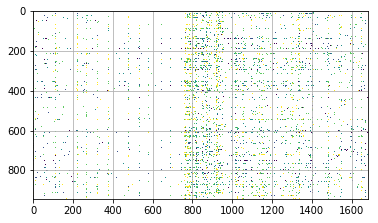

In [101]:
import matplotlib.pyplot as plt
plt.imshow(y)
plt.grid(True)

### rating prediction by BaselineOnly (MLE)

In [104]:
from surprise import BaselineOnly
algo1 = BaselineOnly()
train_data = surprise_data.build_full_trainset() 
# overfitting 의 문제점을 가지고 있다.
algo1.fit(train_data)

Estimating biases using als...


### rating prediction by KNN

In [108]:
algo1.predict('1', '1') # 대충의 rating 값을 알 수 있다. = est

Prediction(uid='1', iid='1', r_ui=None, est=3.8923532488948851, details={'was_impossible': False})

In [114]:
from surprise import KNNBasic
algo2 = KNNBasic()
algo2.fit(train_data)

print(algo2.predict('1','1'))
print(algo2.predict('1', '2'))
print(algo2.predict('1', '1000'))

Computing the msd similarity matrix...
Done computing similarity matrix.
user: 1          item: 1          r_ui = None   est = 4.13   {'actual_k': 40, 'was_impossible': False}
user: 1          item: 2          r_ui = None   est = 3.19   {'actual_k': 40, 'was_impossible': False}
user: 1          item: 1000       r_ui = None   est = 2.95   {'actual_k': 10, 'was_impossible': False}


### SVD

In [117]:
from surprise import SVD

algo3 = SVD()
cross_validate(algo3, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9383  0.9315  0.9307  0.9374  0.9385  0.9353  0.0034  
MAE (testset)     0.7378  0.7343  0.7329  0.7387  0.7400  0.7367  0.0027  
Fit time          4.95    5.02    5.11    4.93    4.98    5.00    0.06    
Test time         0.14    0.22    0.22    0.14    0.20    0.18    0.03    


{'test_rmse': array([ 0.93834539,  0.93145444,  0.93073187,  0.93739254,  0.93849412]),
 'test_mae': array([ 0.73778444,  0.73430384,  0.7329438 ,  0.73866413,  0.73996986]),
 'fit_time': (4.950170993804932,
  5.016341924667358,
  5.110357999801636,
  4.933772087097168,
  4.9845240116119385),
 'test_time': (0.14479780197143555,
  0.21734404563903809,
  0.21803689002990723,
  0.13861608505249023,
  0.19538521766662598)}